# Predictive Maintenance Example Use Case

Wir benötigen in einem ersten Schritt zwei Komponenten:

* *Eine Maschine* (M1) die wir überwachen können
* *Ein Machine Learning Modell* (MLM) das bewertet, ob die Maschine gut oder schlecht läuft

Die Maschine M1 weist einen integrierten Sensor, der alle 1/10 Sekunden einen Wert ausgibt. Der Sensor liefert Werte $v_i \in R, 0 < v_i < 2 $ 
wobei Werte $v_i \leq .5$ als "normal" gelten, Werte $v_i > .5$ als "anormal" sollen. 

# Daten

Es liegen uns folgende Sensor Daten vor

* datasets/sensor_ok.csv - Daten einer Maschine im Normalzustand (keine Fehler)
* datasets/sensor_fail.csv - Daten einer Maschine mit Fehlern, die aber noch funktioniert (wenige Fehler)
* datasetes/sensor_error.csv - Daten einer defekten Maschine (viele Fehler)

# Aufgaben

1. Plotte die Verteilung für jede Maschinen-Konfiguration (Werte-Regimes) wie unten aufgeführt (working ok, fail more often, constantly failing)
2. Schaue Dir die unterschiedlichen Verteilung nach Konfiguration an (was siehst Du?)
3. Beschreibe wie wir Ausreisser mit einem ML Algorithmus oder mit einem statistischen Verfahren erkennen können
4. Implementiere ein einfaches ML Modell das aus den "Sensor-Daten" Ausreisser erkennt

References:

* https://towardsdatascience.com/5-ways-to-detect-outliers-that-every-data-scientist-should-know-python-code-70a54335a623
* https://scikit-learn.org/stable/modules/outlier_detection.html


In [7]:
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

# Plot machine failures

* Use a histogram to show the different machine profiles (ok, failure, error)

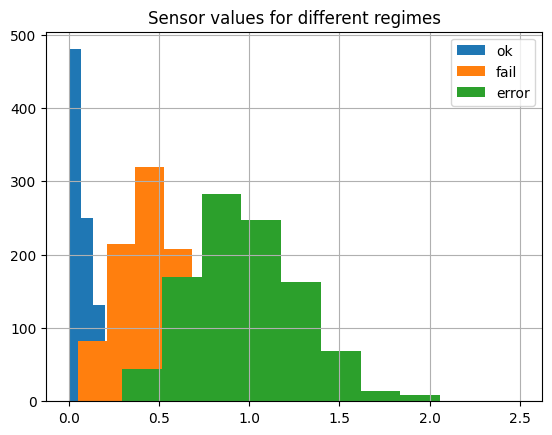

In [8]:
REGIMES = ['ok', 'fail', 'error']
for r in REGIMES:
    df = pd.read_csv(f'datasets/sensor_{r}.csv')
    df['value'].hist(bins=10)
    
plt.title(f'Sensor values for different regimes')
plt.legend(REGIMES)

# How can we detect anomalies? 

* Using statistical methods?
* Why use a machine learning model?

## Train a machine learning model

* Here is a working example using an IsolationForest


 1    0.99
-1    0.01
Name: proportion, dtype: float64

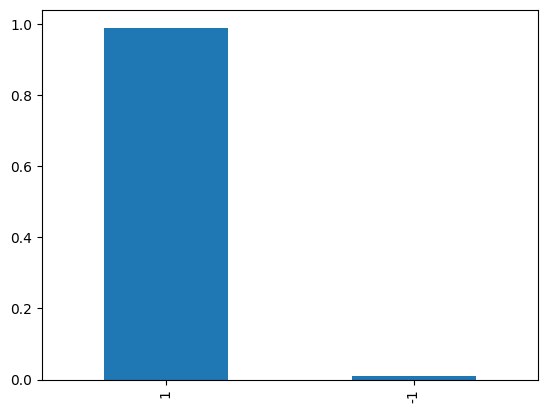

In [9]:
# use an isolation forest
from sklearn.ensemble import IsolationForest

df_train = pd.read_csv('datasets/sensor_ok.csv')
clf = IsolationForest(contamination=.01)

y_test = clf.fit_predict(df_train['value'].values.reshape(-1, 1))
counts = pd.Series(y_test).value_counts(normalize=True)
counts.plot(kind='bar')
counts

-1    0.589
 1    0.411
Name: proportion, dtype: float64

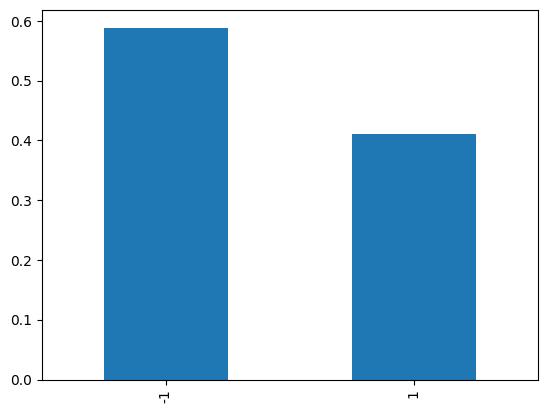

In [10]:
# test the model performance using failing machine
test_data = pd.read_csv('datasets/sensor_fail.csv')

predictions = clf.predict(test_data['value'].values.reshape((-1, 1)))
counts = pd.Series(predictions).value_counts(normalize=True)
counts.plot(kind='bar')
counts

-1    0.989
 1    0.011
Name: proportion, dtype: float64

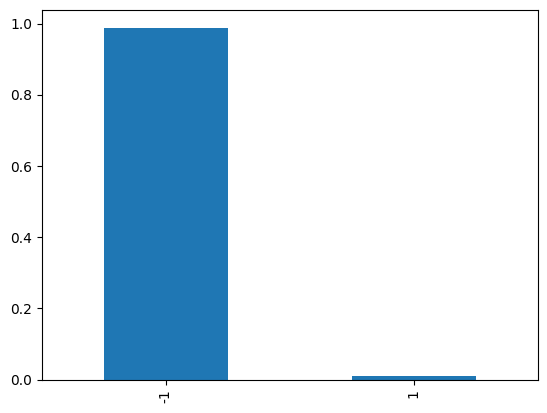

In [11]:
# test the model performance using erronous machine
test_data = pd.read_csv('datasets/sensor_error.csv')

predictions = clf.predict(test_data['value'].values.reshape((-1, 1)))
counts = pd.Series(predictions).value_counts(normalize=True)
counts.plot(kind='bar')
counts

In [12]:
# Let's save the model and the training data for later use
from util import save_model

!mkdir -p datasets models

df_train.to_csv('datasets/traindata.csv', index=False)
save_model(clf, 'models/mymodel')